# Question 3 

### Can we accurately predict how much tips a driver will get based on distance traveled, time spent, hour of the day and day of the week in January 2013?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.path as mplPath
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
%matplotlib inline

C:\Users\Victor\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def scatter_all(x,y):
    plt.scatter(x,y,color=['red','blue'])
    plt.title('Predicted vs Real Tips')
    plt.xlabel('Predicted Tips')
    plt.ylabel('Real Tips')
    plt.show()

In [3]:
def scatter_less(x,y):
    plt.scatter(x[:2000],y[:2000],color=['red','blue'])
    plt.xlim(-1,40)
    plt.ylim(-1, 40)
    plt.title('Predicted vs Real Tips')
    plt.xlabel('Predicted Tips')
    plt.ylabel('Real Tips')
    plt.show()

In [4]:
def scatter_even_less(x,y):
    plt.scatter(x[:500],y[:500],color=['red','blue'])
    plt.xlim(-1,20)
    plt.ylim(-1, 20)
    plt.title('Predicted vs Real Tips')
    plt.xlabel('Predicted Tips')
    plt.ylabel('Real Tips')
    plt.show()

In [5]:
def knearestRegressor(df, day):
    
    # Break-down by days of the week
    print("Looking at ",day)
    df = df.loc[(df['weekday'] == day)]
    
    # For the future, not sure if it's still running sometimes...
    # Also good to know if we're getting the right data and its shape
    print(df.shape)
    print(df.head())
    
    # Create the training and testing sets
    train = df.sample(frac=0.8, random_state=1)
    test = df.loc[~df.index.isin(train.index)]
    
    # Create the X and Y training and testing sets 
    Xtrain = train[['weekday','hour','pickup','trip_distance','total_amount','time_spent']]
    ytrain = train[['tip_amount']]
    Xtest = test[['weekday','hour','pickup','trip_distance','total_amount','time_spent']]
    ytest = test[['tip_amount']]
    
    # Prepare the matrix for X train and X test
    Xtrain = Xtrain.join(pd.get_dummies(Xtrain['hour']))
    Xtrain = Xtrain.drop(['hour','weekday','pickup'], axis=1)
    Xtest = Xtest.join(pd.get_dummies(Xtest['hour']))
    Xtest = Xtest.drop(['hour','weekday','pickup'], axis=1)
    
    # Perform cross-validation (average 30 minutes for each set)
    # Cross-validation on the training data using the KNeighborsRegressor Classifier
    cross_validation = cross_val_score(KNeighborsRegressor(),Xtrain, ytrain,cv=5)
    
    # Get the accuracy of our training set
    print("Accuracy for ",day ," : %0.4f (+/- %0.4f)" % (cross_validation.mean(), cross_validation.std() * 2))
    
    # Peform KNeighborsRegressor
    clf = KNeighborsRegressor().fit(Xtrain, ytrain)
    score = clf.score(Xtest, ytest)
    print("Score for fold: %.4f" % (score))
    
    # Find out our error MSE and RMSE
    mse = mean_squared_error(clf.predict(Xtest),ytest)
    print("MSE = ",mse)
    print("RMSE = ",np.sqrt(mse))
    
    # Get the predicted data
    prediction_data = clf.predict(Xtest)
    
    # Get the real data
    tip_amt = ytest.tip_amount
    real_data = []
    for tips in tip_amt:
        real_data.append(tips)
        
    # Plot some graphs
    # This will help with the analysis by looking at smaller chunks at a time
    scatter_all(prediction_data,real_data)
    scatter_less(prediction_data,real_data)
    scatter_even_less(prediction_data,real_data)
    return 

In [6]:
df=pd.read_csv("datasets/clean-january-2013.csv") # tippers and non-tippers together

Looking at  Monday
Accuracy for  Monday  : 0.8179 (+/- 0.0136)
Score for fold: 0.8126
MSE =  0.807310714273
RMSE =  0.898504710212


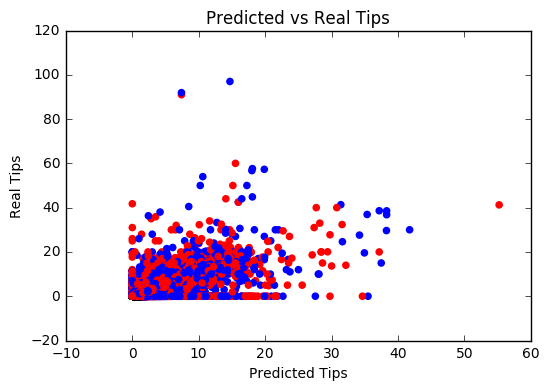

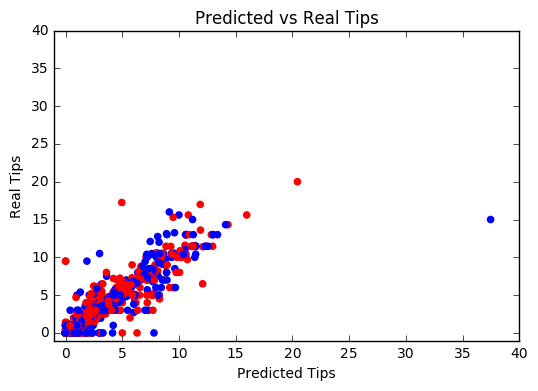

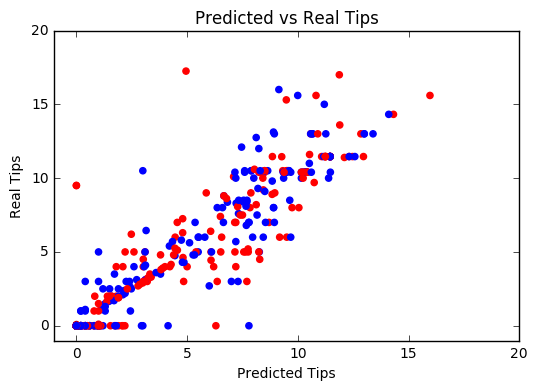

Looking at  Tuesday
Accuracy for  Tuesday  : 0.8115 (+/- 0.0187)
Score for fold: 0.8000
MSE =  0.837370954489
RMSE =  0.915079753076


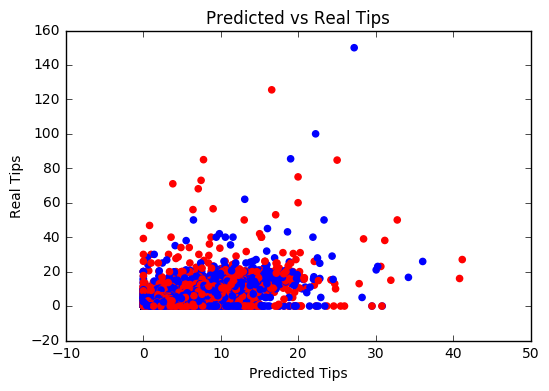

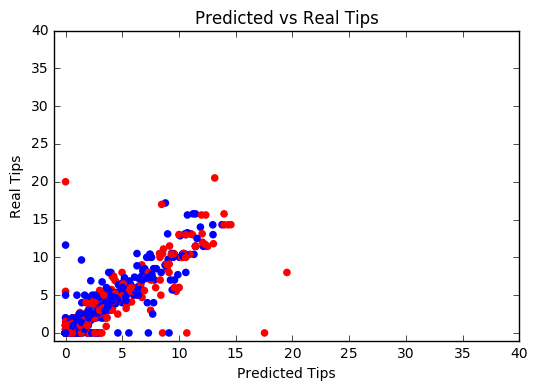

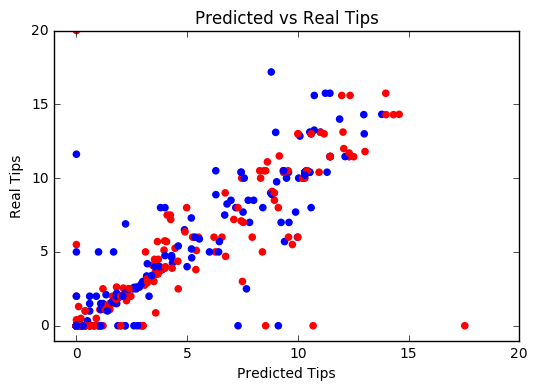

Looking at  Wednesday
Accuracy for  Wednesday  : 0.8174 (+/- 0.0173)
Score for fold: 0.8096
MSE =  0.803119886278
RMSE =  0.896169563352


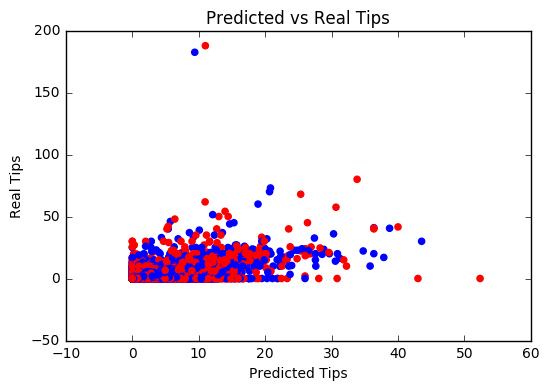

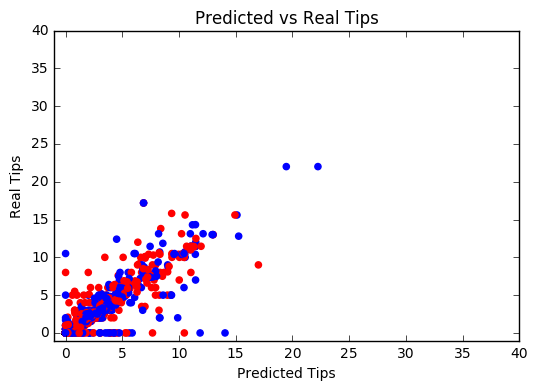

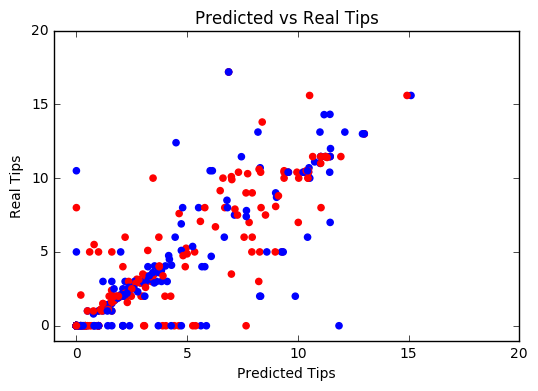

Looking at  Thursday
Accuracy for  Thursday  : 0.8057 (+/- 0.0199)
Score for fold: 0.8092
MSE =  0.805850964906
RMSE =  0.897692021189


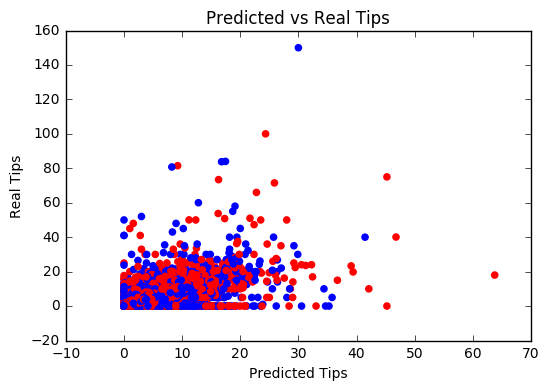

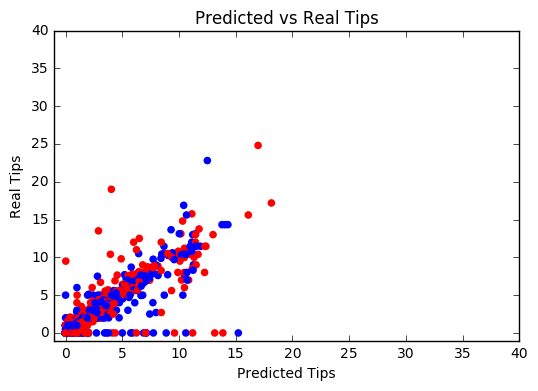

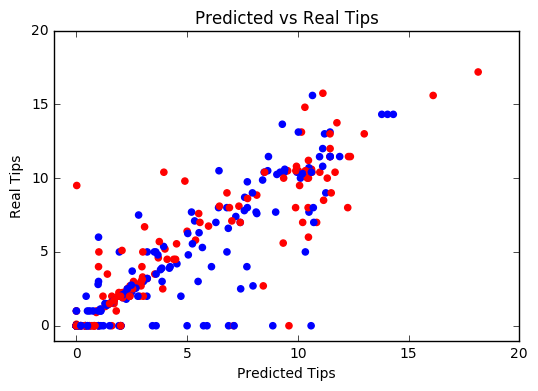

Looking at  Friday
Accuracy for  Friday  : 0.7996 (+/- 0.0276)
Score for fold: 0.7901
MSE =  0.812714324121
RMSE =  0.901506696659


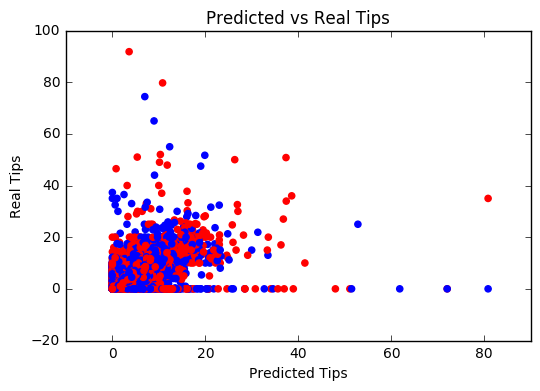

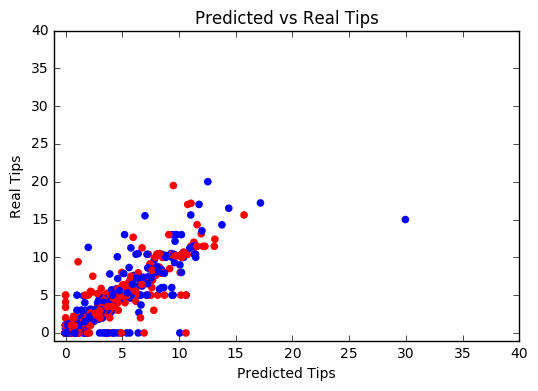

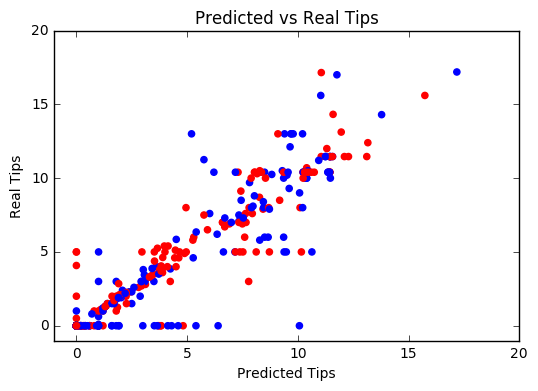

Looking at  Saturday
Accuracy for  Saturday  : 0.8008 (+/- 0.0263)
Score for fold: 0.8077
MSE =  0.644994744525
RMSE =  0.803115648288


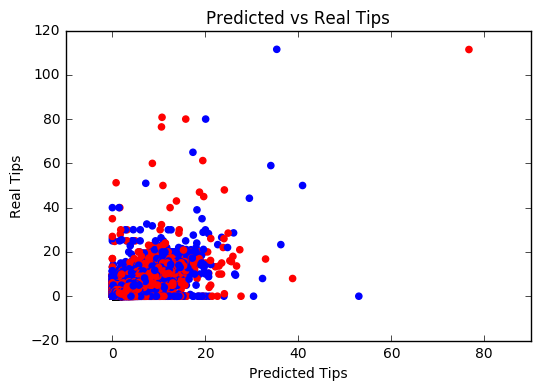

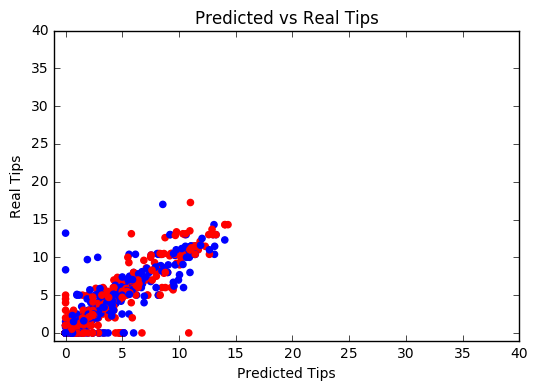

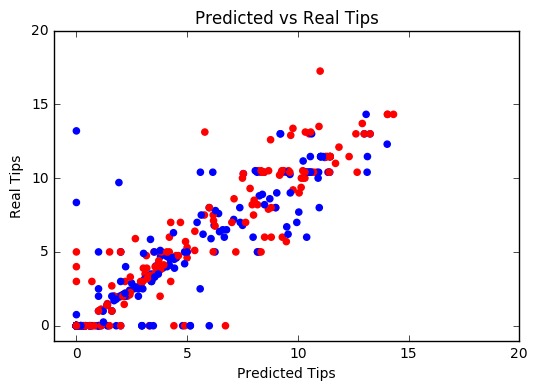

Looking at  Sunday
Accuracy for  Sunday  : 0.7898 (+/- 0.0235)
Score for fold: 0.8086
MSE =  0.773997460192
RMSE =  0.87977125447


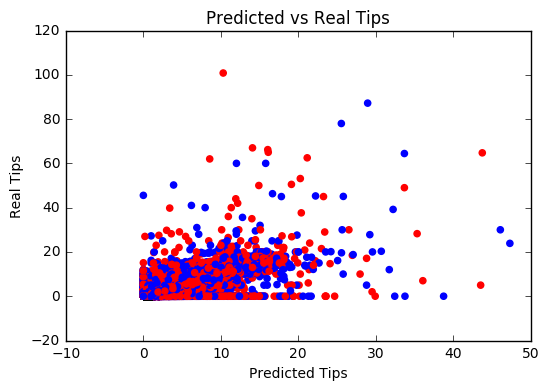

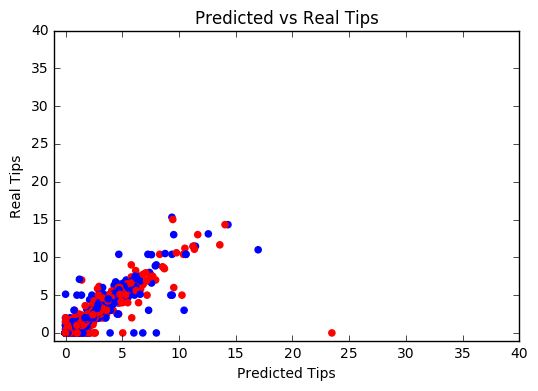

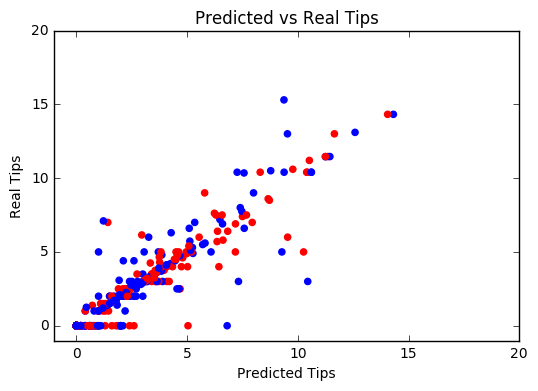

In [7]:
dayweek = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

for day in dayweek:
    knearestRegressor(df,day)